# k-means : k-평균

In [ ]:
# 기본 옵션
options(warn = -1)
options(repr.plot.width=15, repr.plot.height=9)
options(scipen = 100)
Sys.setlocale(category = "LC_ALL", locale = "ko_KR.UTF-8")

### k-Means
- k-Means는 표준화를 시도하여야 하나 현재 Data는 점수이므로 표준화를 하지 않는다.

In [7]:
data <- read.csv("Data/kmeans.csv", row.names = "X")

k_means <- kmeans(data, centers = 3, iter.max = 10000)
k_means

K-means clustering with 3 clusters of sizes 2, 2, 2

Cluster means:
  식당맛집점수 식당청결점수
1         87.5         91.5
2         50.5         65.0
3         50.5         27.5

Clustering vector:
  강릉찌개   수원갈비   한라식당   김천국밥 양양햄버거   제주식당 
         1          2          3          2          3          1 

Within cluster sum of squares by cluster:
[1]  17.0  90.5 533.0
 (between_SS / total_SS =  90.3 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [9]:
k_means$cluster

강릉찌개   수원갈비   한라식당   김천국밥 양양햄버거   제주식당 
         1          2          3          2          3          1

In [11]:
data$k_group <- k_means$cluster
head(data)

,식당맛집점수,식당청결점수,k_group
,<int>,<int>,<int>
강릉찌개,90,93,1
수원갈비,55,70,2
한라식당,36,20,3
김천국밥,46,60,2
양양햄버거,65,35,3
제주식당,85,90,1


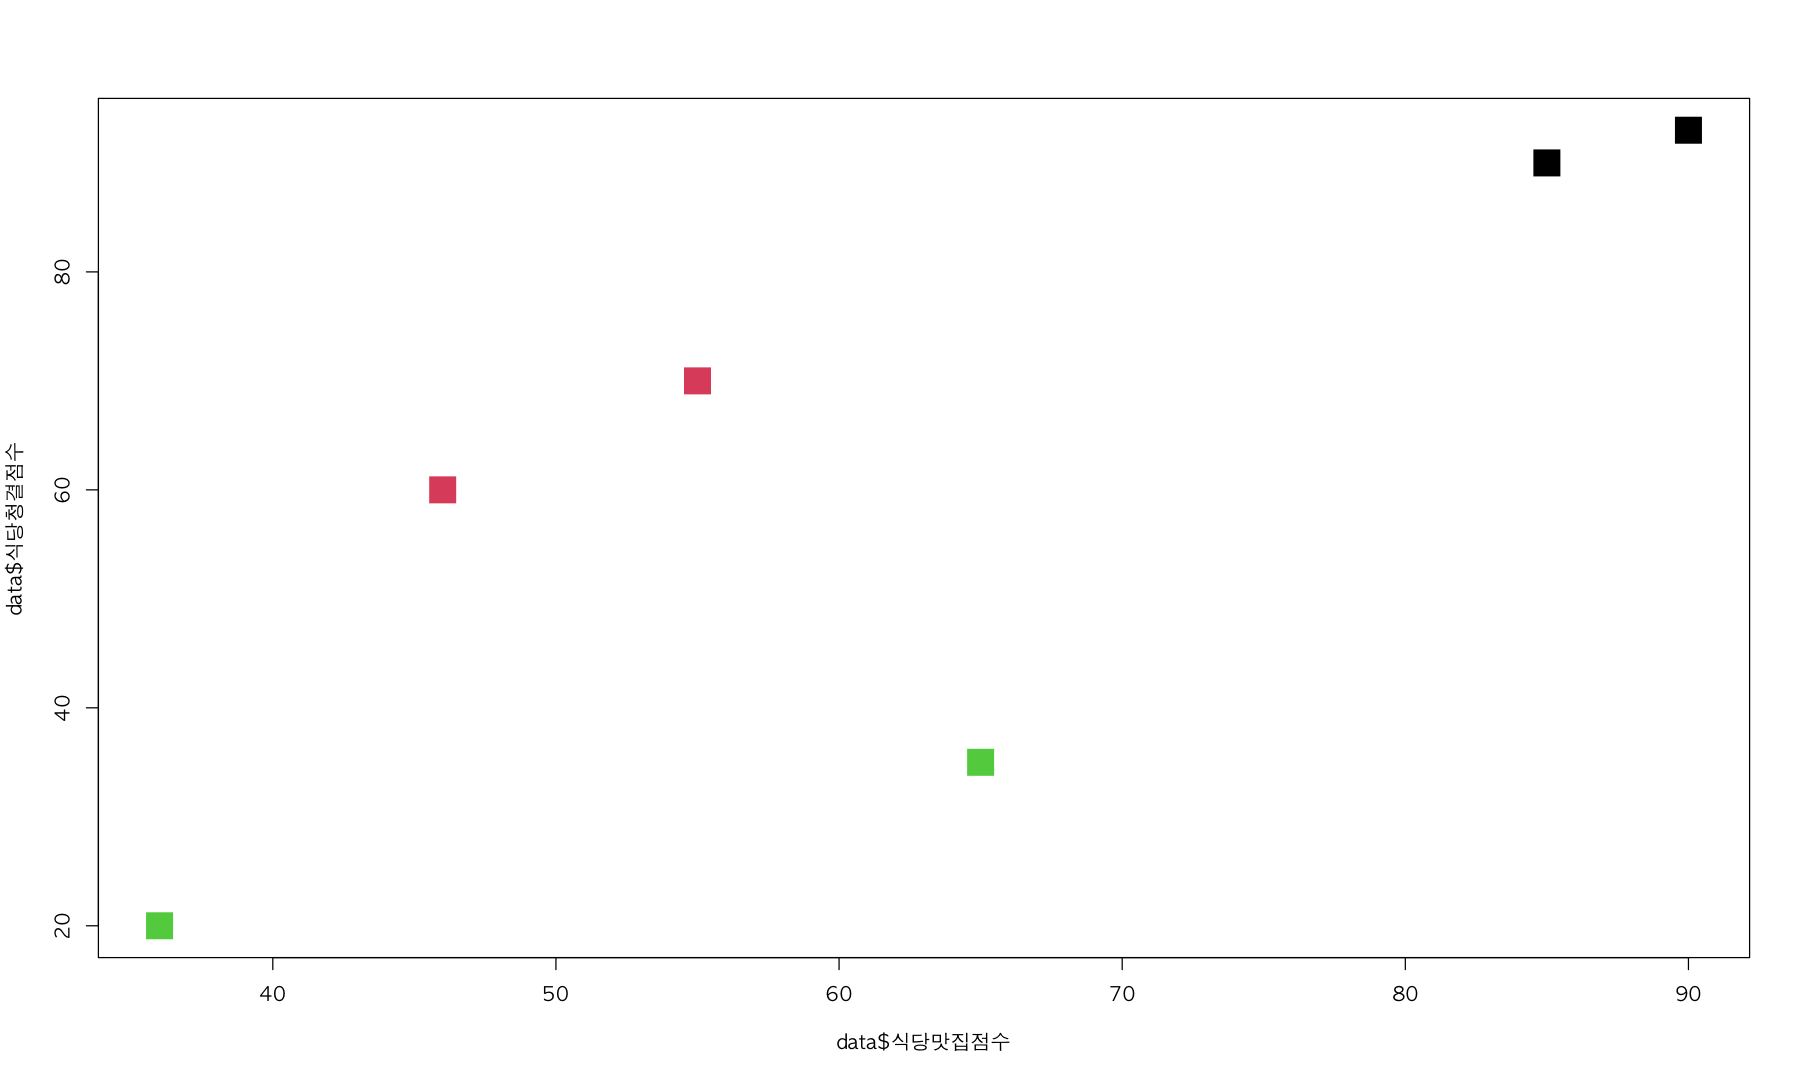

In [19]:
par(family = 'applegothic',bg = 'white')
plot(data$식당맛집점수, data$식당청결점수, col = data$k_group, cex = 3, pch = 15)

## k-means에서 k값을 결정하는 방법

In [20]:
data.k <- data[,-3]

In [23]:
# install.packages("NbClust")
library(NbClust)

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


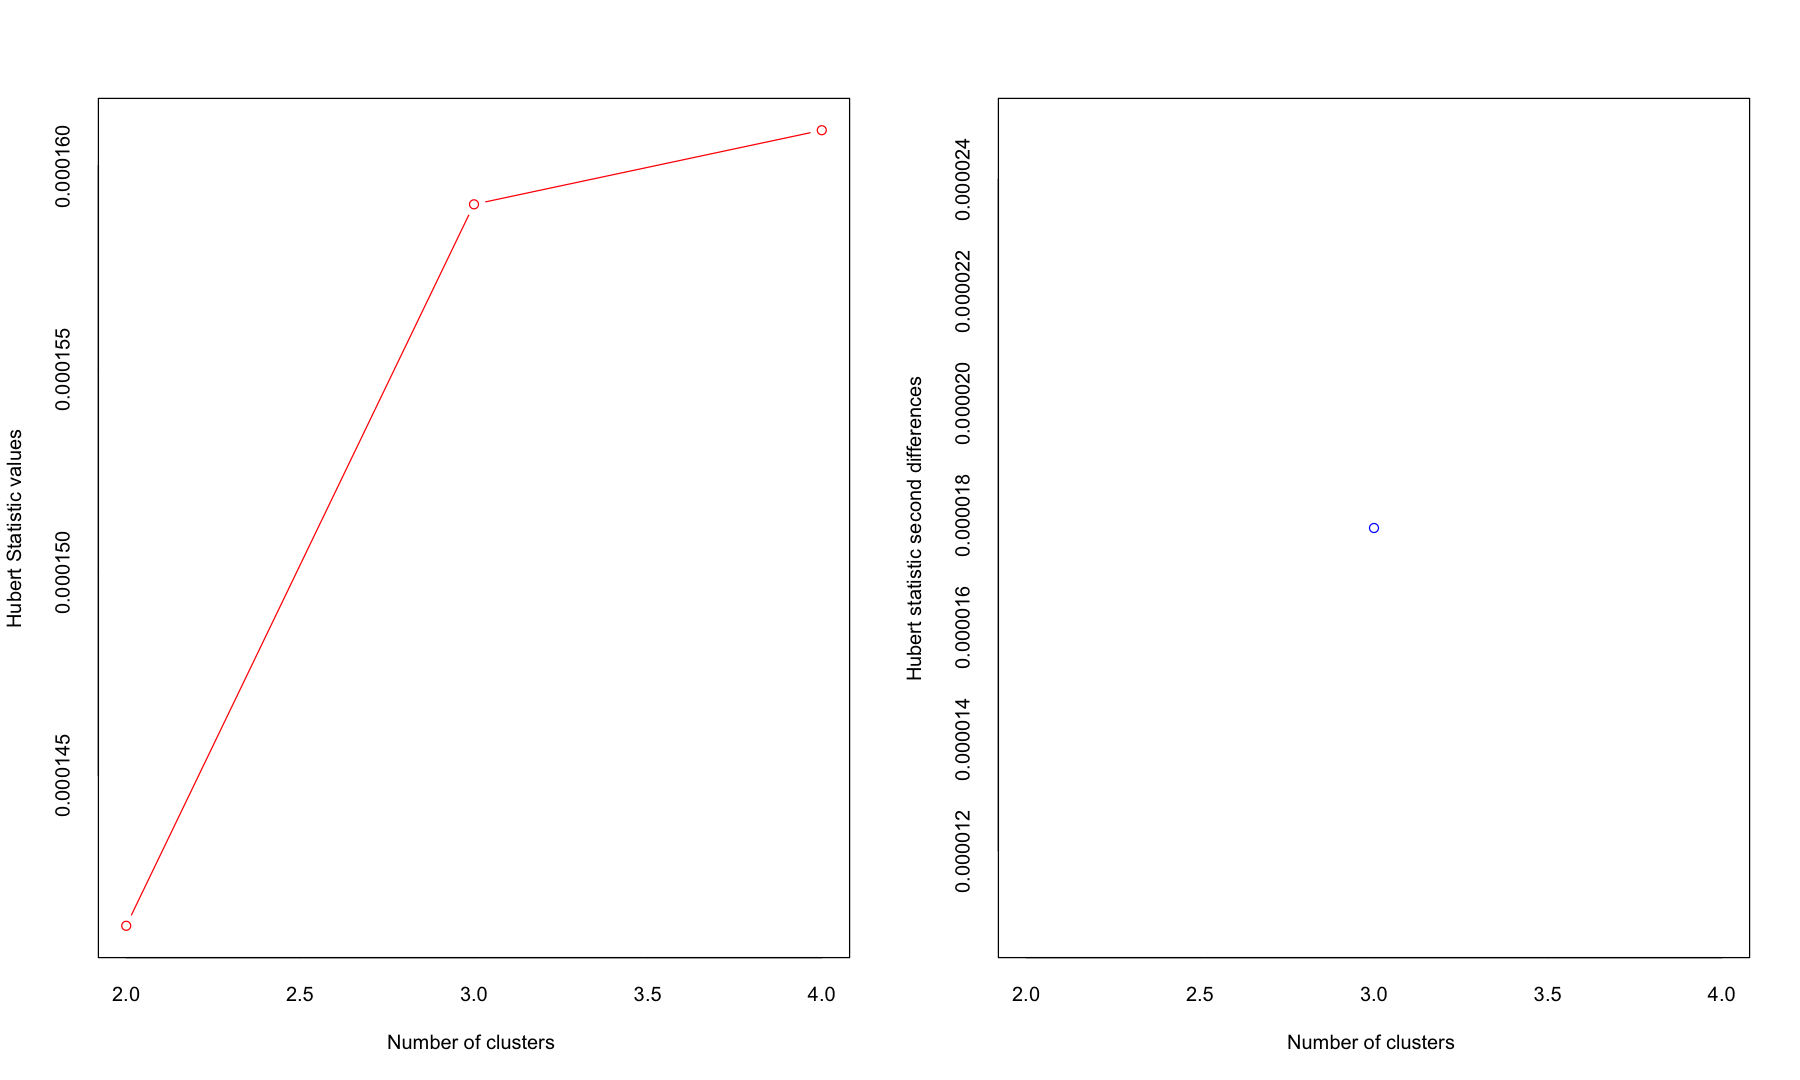

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 6 proposed 2 as the best number of clusters 
* 14 proposed 3 as the best number of clusters 
* 3 proposed 4 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  3 
 
 
******************************************************************* 


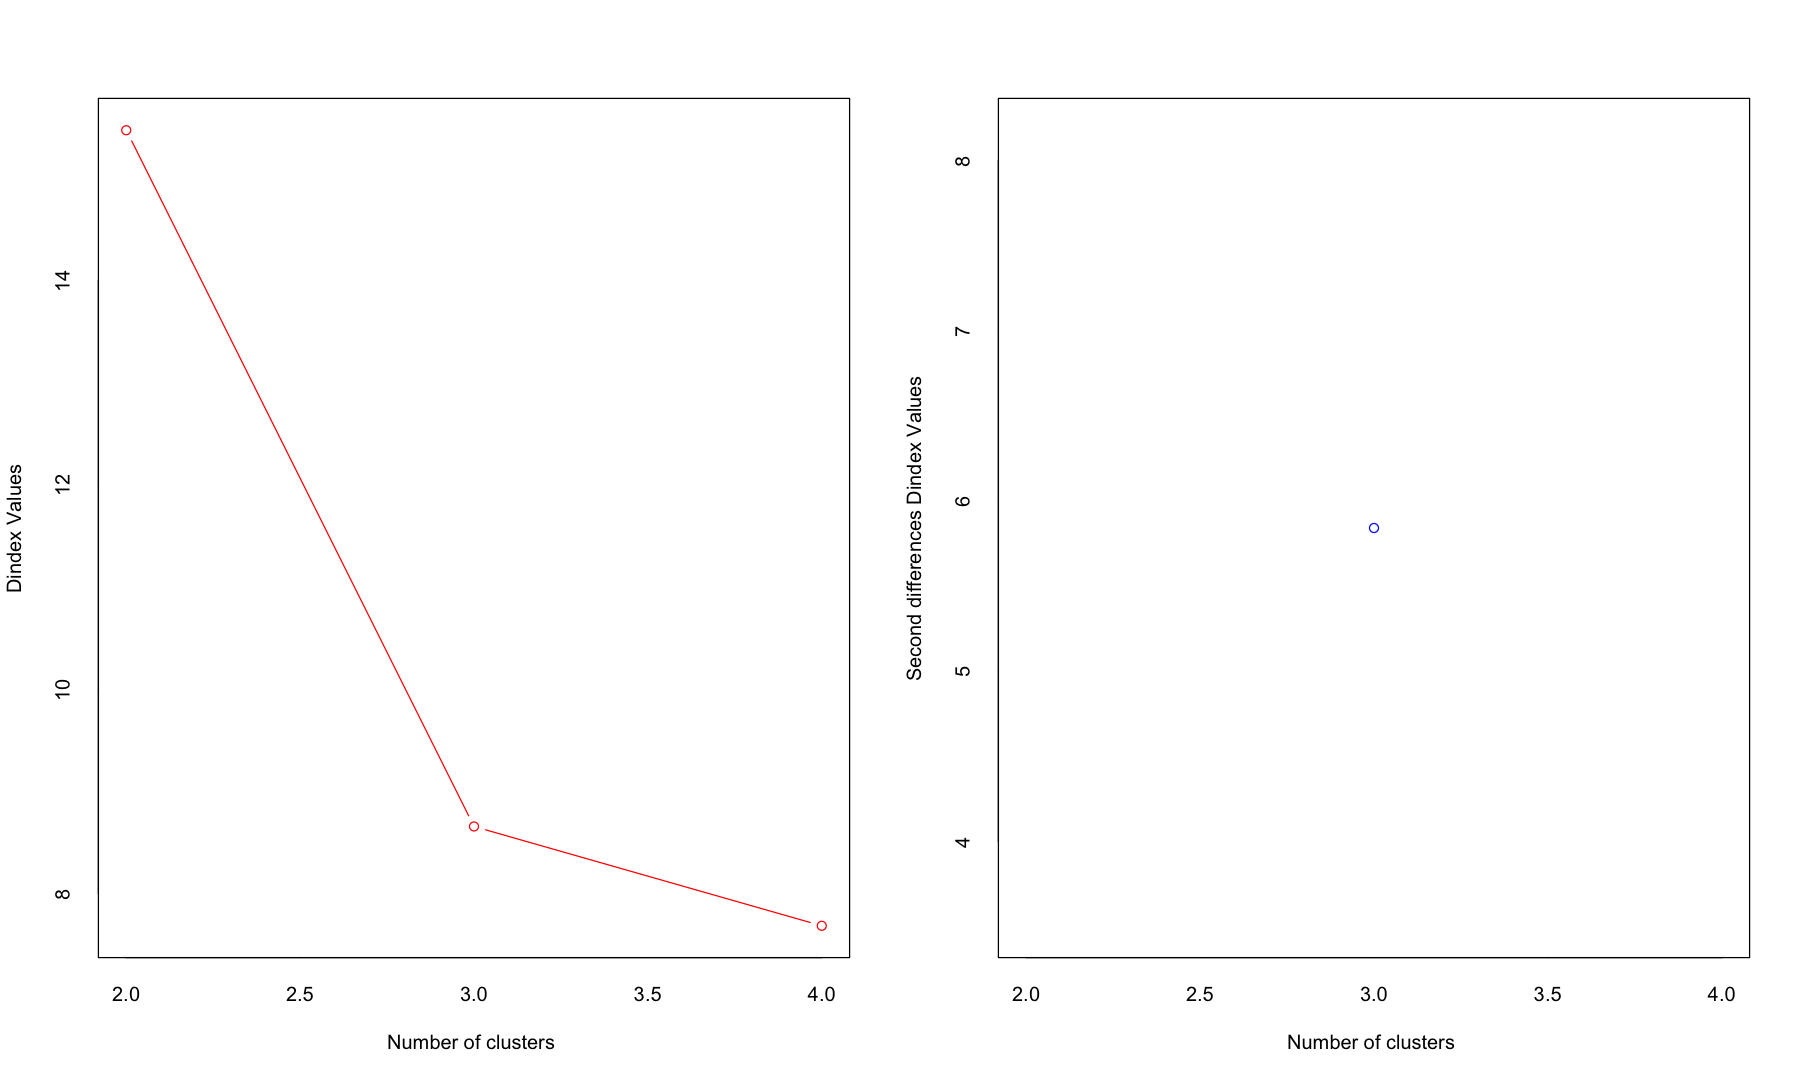

In [29]:
par(bg = 'white')
nc <- NbClust(data.k, min.nc = 2, max.nc = 4, method='kmeans')

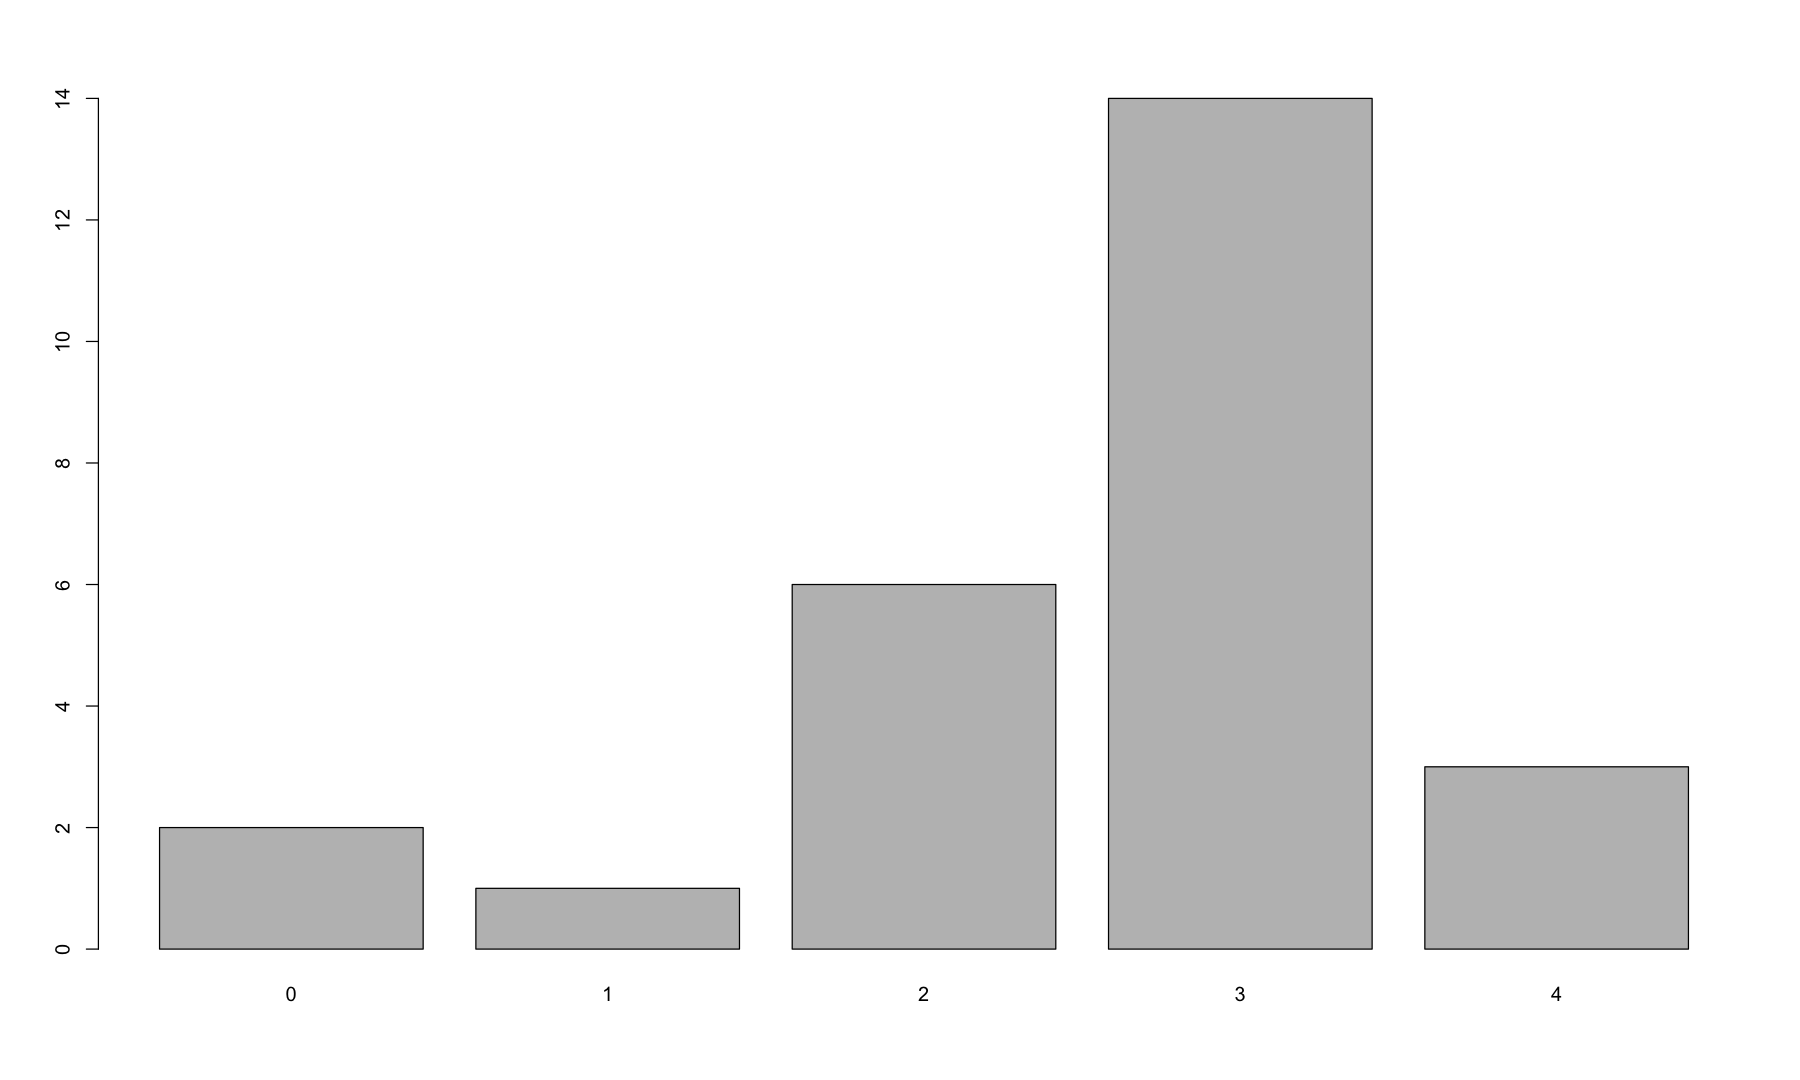

In [30]:
par(bg = 'white')
barplot(table(nc$Best.nc[1,]))

In [33]:
iris.n <- iris[,-5]

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


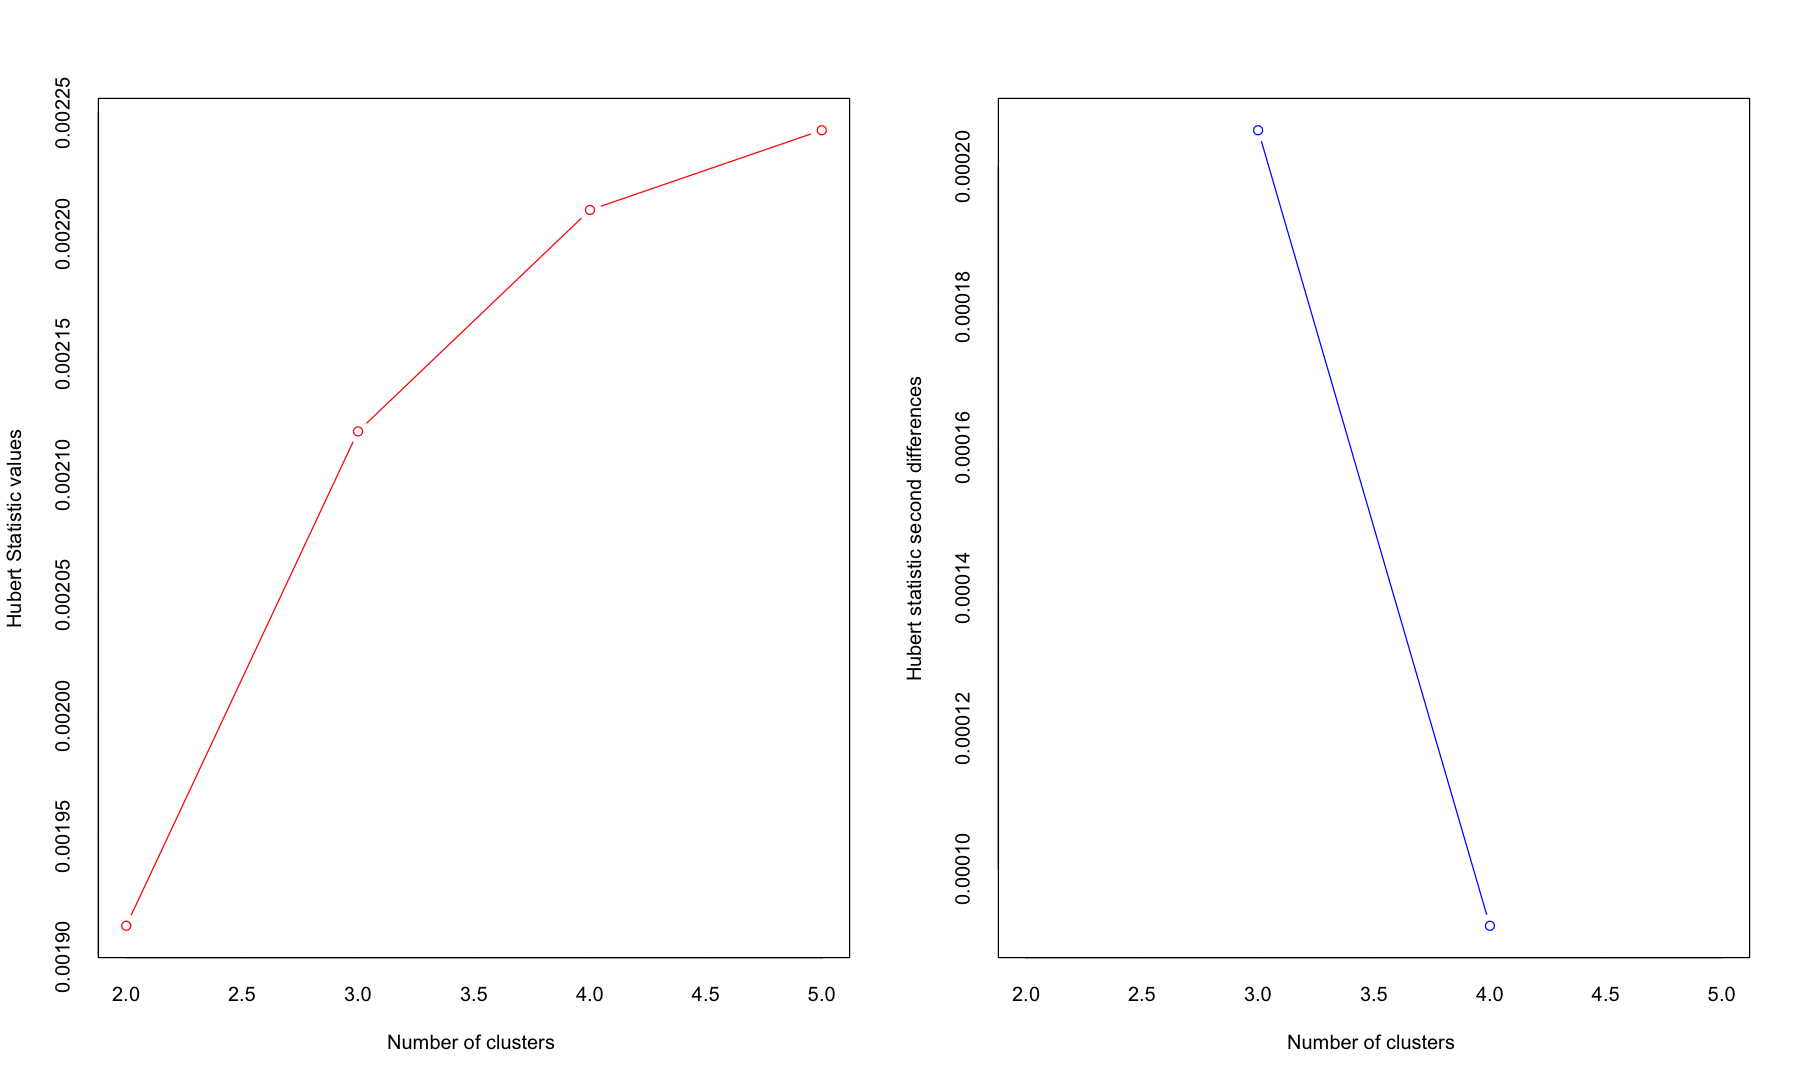

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 11 proposed 2 as the best number of clusters 
* 11 proposed 3 as the best number of clusters 
* 2 proposed 5 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  2 
 
 
******************************************************************* 


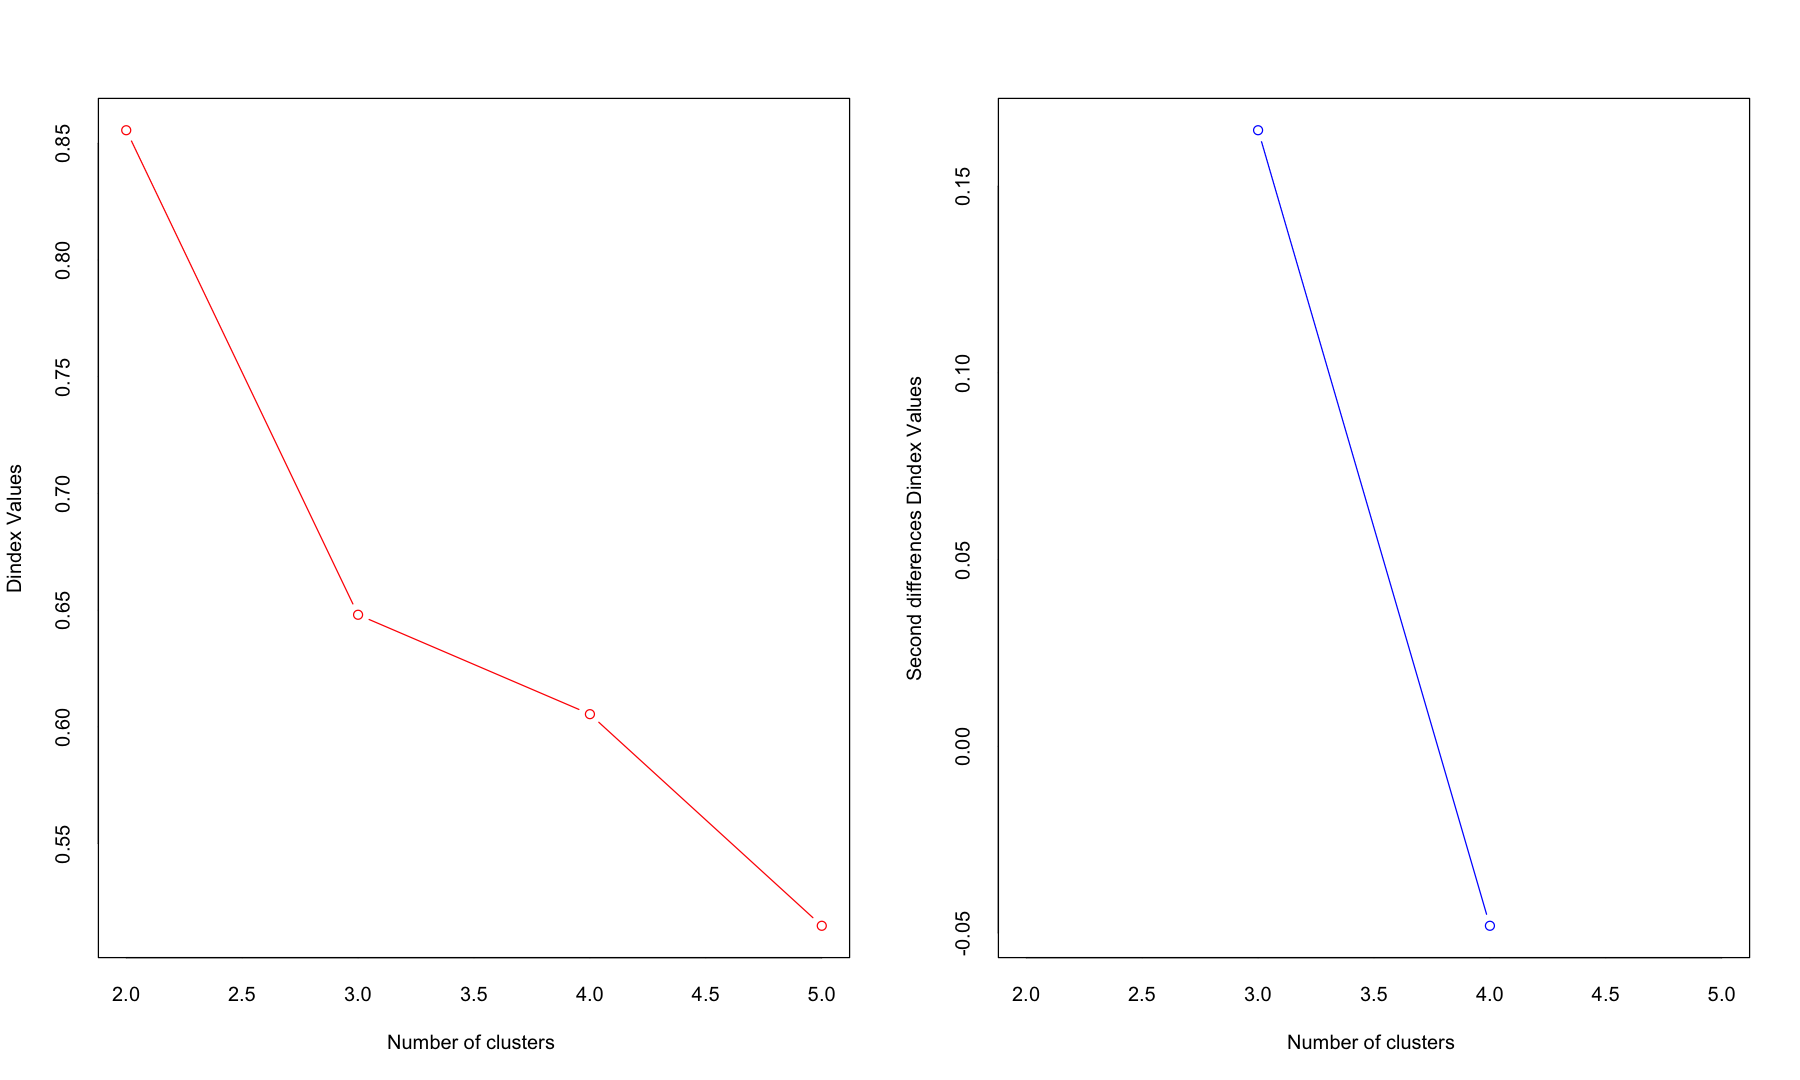

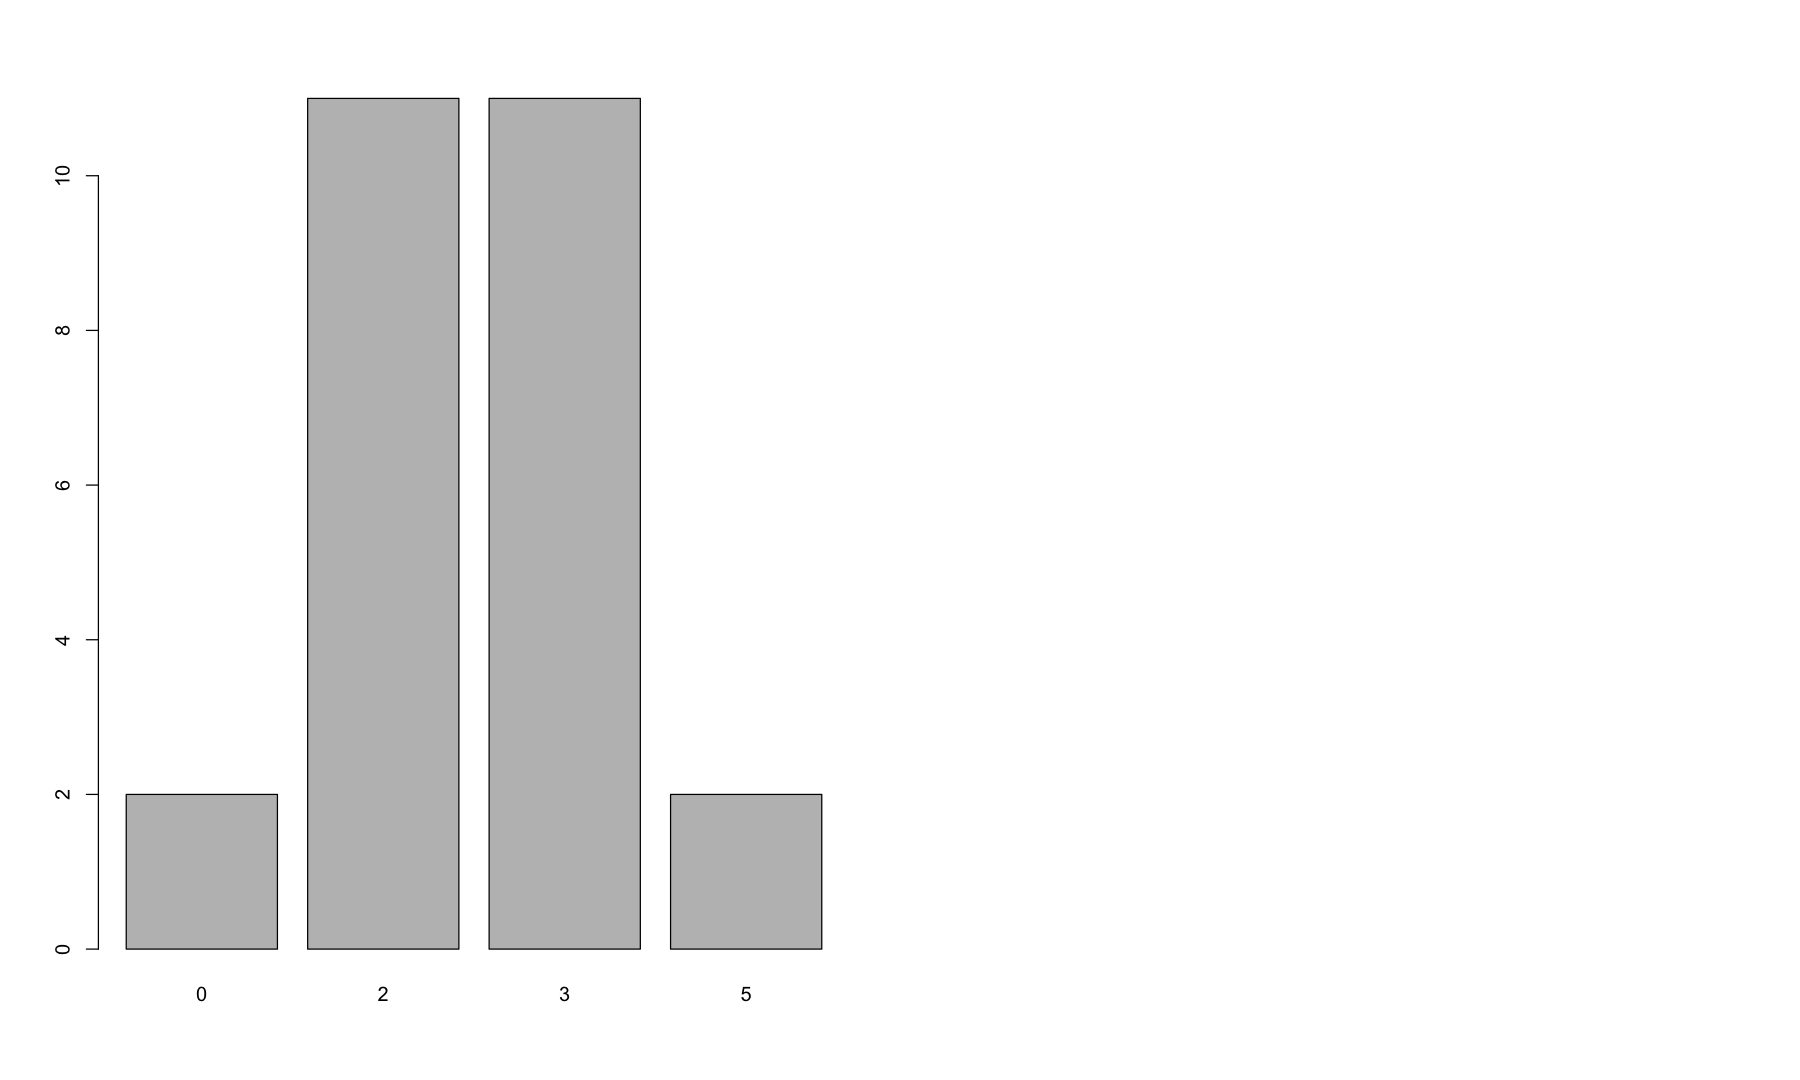

In [47]:
par(bg = 'white')
iris.nc <- NbClust(iris.n, min.nc = 2, max.nc = 5, method='kmeans')

barplot(table(iris.nc$Best.nc[1,]))

In [48]:
iris.nc$Best.nc

,KL,CH,Hartigan,CCC,Scott,Marriot,TrCovW,TraceW,Friedman,Rubin,...,Ratkowsky,Ball,PtBiserial,Frey,McClain,Dunn,Hubert,SDindex,Dindex,SDbw
Number_clusters,3.000,3.0000,3.0000,3.0000,3.0000,3.0,3.0000,3.0000,5.0000,3.000,...,2.0000,3.0000,2.0000,2.0000,2.0000,3.0000,0,2.0000,0,5.0000
Value_Index,12.489,561.6278,122.7107,37.6701,202.0631,269196.9,796.9882,66.0903,85.5354,-45.822,...,0.5462,49.8902,0.8345,1.7571,0.2723,0.0988,0,0.9849,0,0.1542


In [57]:
iris.n$k_group  <- kmeans(iris[-5],centers = 2,iter.max = 10000)$cluster

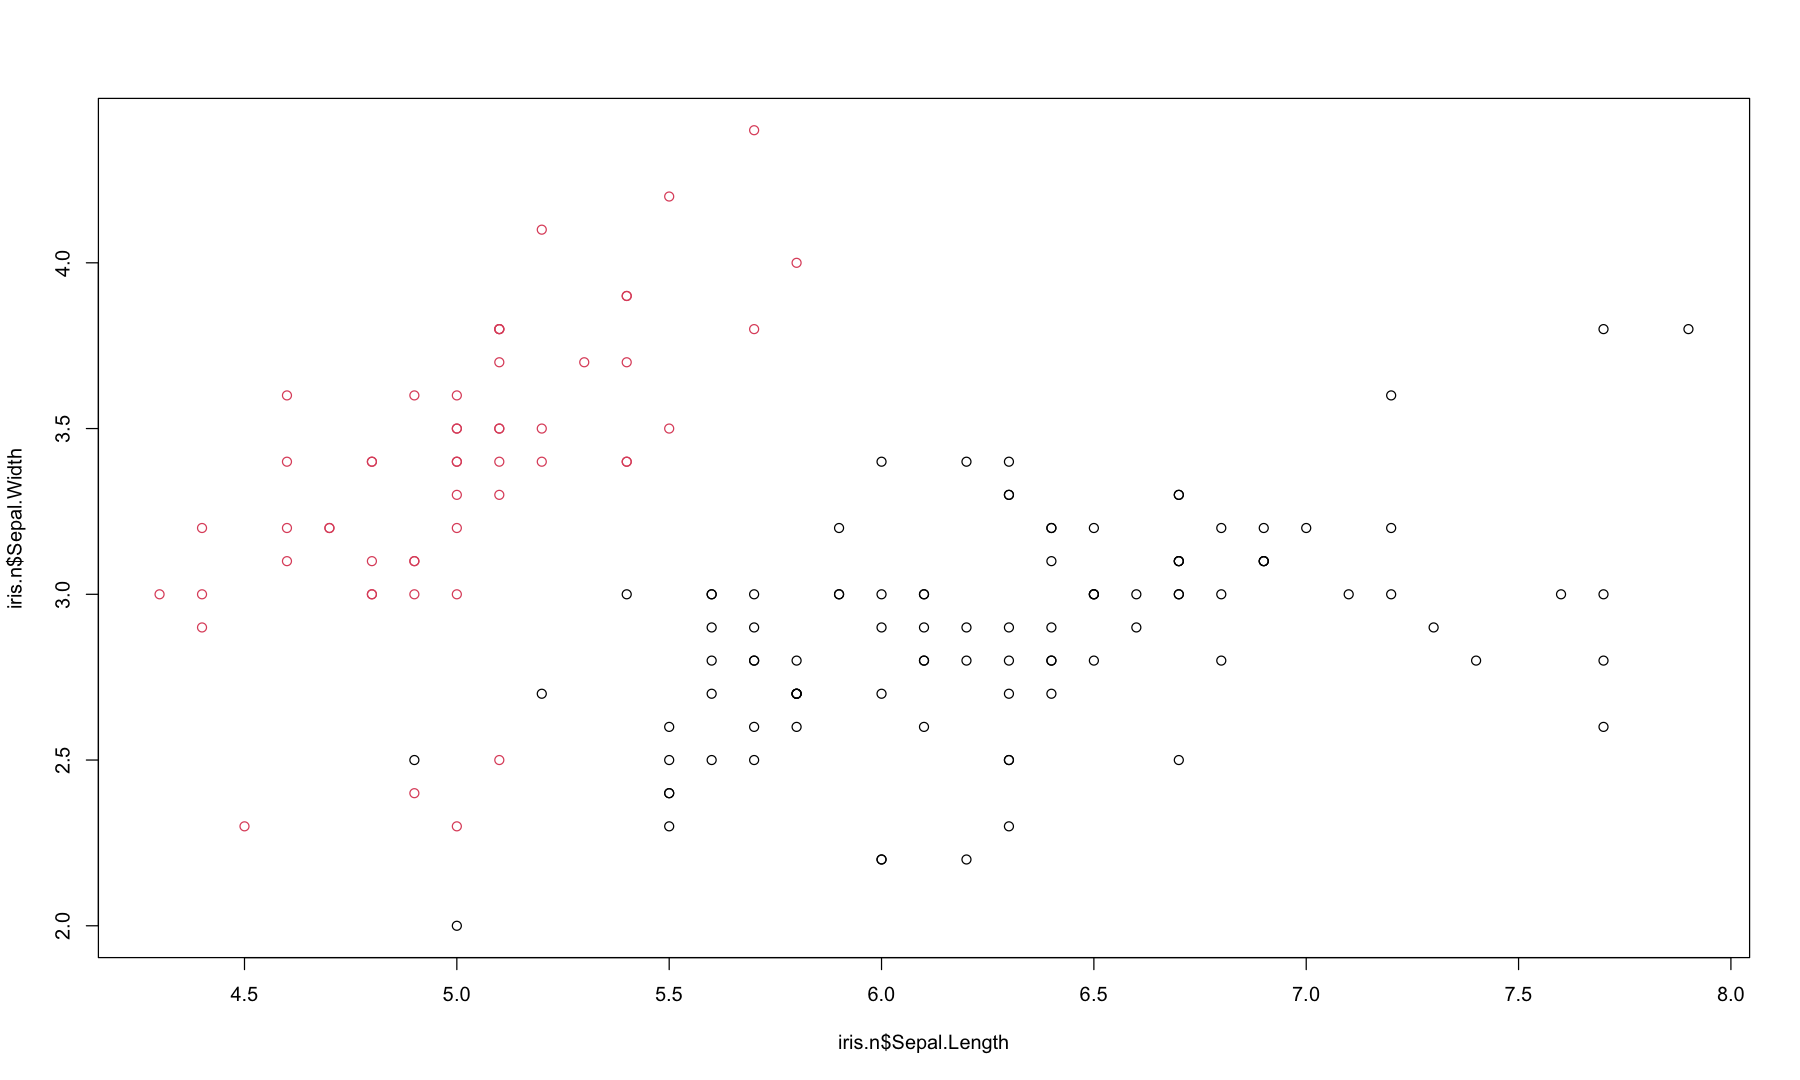

In [61]:
par(bg = 'white')
plot(
    iris.n$Sepal.Length,iris.n$Sepal.Width, # ,iris.n$Petal.Length,iris.n$Petal.Width,
    col=iris.n$k_group
)